Description

In [1]:
# different genes

# Import Functions and Data

In [2]:
import functions_paper_1
import importlib
from functions_paper_1 import *
exec(open("functions_paper_1.py").read())
# Local path to Sharepoint (on your computer, change if you are a different user)
#datadir = Path(Path('../datadir_yb.txt').read_text())
datadir = Path(Path('../../datadir_srk.txt').read_text())
figure_folder = './figs_2024_promoter_editing_paper/fig_diffGenes/'

In [3]:
# Bioreplicates
# 20240404flow_exp20240401_BioAp1_difgen
# 20240404flow_exp20240401_BioAp2_difgen
# 20240404flow_exp20240401_BioBp1_difgen
# 20240404flow_exp20240401_BioBp2_difgen
# 20240404flow_exp20240401_BioCp1_difgen
# 20240404flow_exp20240401_BioCp2_difgen

In [4]:
# Import Data - bioreplicate 1 
folder = '20240404flow_exp20240401_BioAp1_difgen'
file_path = datadir/'instruments'/'data'/'attune'/'Sneha'/folder/'export_singlets' #Assign file paths
yaml_path = datadir/'instruments'/'data'/'attune'/'Sneha'/folder/'well_metadata.yaml' #Assign yaml paths 
data1 = rd.flow.load_csv_with_metadata(file_path, yaml_path) #Pull data
data1['bioreplicate'] = '20240404flow_exp20240401_BioA' 

In [5]:
# Import Data - bioreplicate 1 
folder = '20240404flow_exp20240401_BioAp2_difgen'
file_path = datadir/'instruments'/'data'/'attune'/'Sneha'/folder/'export_singlets' #Assign file paths
yaml_path = datadir/'instruments'/'data'/'attune'/'Sneha'/folder/'well_metadata.yaml' #Assign yaml paths 
data1_2 = rd.flow.load_csv_with_metadata(file_path, yaml_path) #Pull data
data1_2['bioreplicate'] = '20240404flow_exp20240401_BioA' 

In [6]:
# Import Data - bioreplicate 2
folder = '20240404flow_exp20240401_BioBp1_difgen'
file_path = datadir/'instruments'/'data'/'attune'/'Sneha'/folder/'export_singlets' #Assign file paths
yaml_path = datadir/'instruments'/'data'/'attune'/'Sneha'/folder/'well_metadata.yaml' #Assign yaml paths 
data2 = rd.flow.load_csv_with_metadata(file_path, yaml_path) #Pull data
data2['bioreplicate'] = '20240404flow_exp20240401_BioB' 

In [7]:
# Import Data - bioreplicate 2
folder = '20240404flow_exp20240401_BioBp2_difgen'
file_path = datadir/'instruments'/'data'/'attune'/'Sneha'/folder/'export_singlets' #Assign file paths
yaml_path = datadir/'instruments'/'data'/'attune'/'Sneha'/folder/'well_metadata.yaml' #Assign yaml paths 
data2_2 = rd.flow.load_csv_with_metadata(file_path, yaml_path) #Pull data
data2_2['bioreplicate'] = '20240404flow_exp20240401_BioB' 

In [8]:
# Import Data - bioreplicate 3
folder = '20240404flow_exp20240401_BioCp1_difgen'
file_path = datadir/'instruments'/'data'/'attune'/'Sneha'/folder/'export_singlets' #Assign file paths
yaml_path = datadir/'instruments'/'data'/'attune'/'Sneha'/folder/'well_metadata.yaml' #Assign yaml paths 
data3 = rd.flow.load_csv_with_metadata(file_path, yaml_path) #Pull data
data3['bioreplicate'] = '20240404flow_exp20240401_BioC' 

In [9]:
# Import Data - bioreplicate 3
folder = '20240404flow_exp20240401_BioCp2_difgen'
file_path = datadir/'instruments'/'data'/'attune'/'Sneha'/folder/'export_singlets' #Assign file paths
yaml_path = datadir/'instruments'/'data'/'attune'/'Sneha'/folder/'well_metadata.yaml' #Assign yaml paths 
data3_2 = rd.flow.load_csv_with_metadata(file_path, yaml_path) #Pull data
data3_2['bioreplicate'] = '20240404flow_exp20240401_BioC' 

In [10]:
#merge data

data = pd.concat([data1, data1_2, data2, data2_2, data3, data3_2], ignore_index=True)

In [11]:
data.columns.unique()

Index(['reporter', 'Cre', 'ZF', 'well', 'population', 'FSC-A', 'FSC-H',
       'FSC-W', 'SSC-A', 'SSC-H', 'SSC-W', 'mGL-A', 'mGL-H', 'mGL-W',
       'iRFP670-A', 'iRFP670-H', 'iRFP670-W', 'TagBFP-A', 'TagBFP-H',
       'TagBFP-W', 'Janelia Fluor 549-A', 'Janelia Fluor 549-H',
       'Janelia Fluor 549-W', 'mCherry-A', 'mCherry-H', 'mCherry-W', 'Time',
       'bioreplicate'],
      dtype='object')

In [12]:
#No negatives 
data = data[data['mGL-A']>0] #no neg. eGFP
data = data[data['TagBFP-A']>0] #no neg tagBFP
data = data[data['mCherry-A']>0] #no neg mRuby
data = data[data['Janelia Fluor 549-A']>0] #no neg mCherry
data = data[data['iRFP670-A']>0] #no neg iRFP670
data['log10 mGL-A'] = np.log10(data['mGL-A'])

In [13]:
data['bioreplicate'].unique()

array(['20240404flow_exp20240401_BioA', '20240404flow_exp20240401_BioB',
       '20240404flow_exp20240401_BioC'], dtype=object)

In [14]:
iRFP670_gate = 10000 
data_iRFP670gated = data[ data['iRFP670-A'] > iRFP670_gate]

In [15]:
#Combine ZF and Cre Conditions 
data_iRFP670gated['Rept.Cre'] = data_iRFP670gated['reporter'] + '.' + data_iRFP670gated['Cre']
data_iRFP670gated['Rept.ZF.Cre'] = data_iRFP670gated['reporter'] + '.' +data_iRFP670gated['ZF'] + '.' + data_iRFP670gated['Cre']
data['Rept.ZF.Cre'] = data['reporter'] + '.' +data['ZF'] + '.' + data['Cre']

<ipython-input-15-b879651396b8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_iRFP670gated['Rept.Cre'] = data_iRFP670gated['reporter'] + '.' + data_iRFP670gated['Cre']
<ipython-input-15-b879651396b8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_iRFP670gated['Rept.ZF.Cre'] = data_iRFP670gated['reporter'] + '.' +data_iRFP670gated['ZF'] + '.' + data_iRFP670gated['Cre']


In [16]:
#Combine ZF and Cre Conditions 
data_iRFP670gated['cond'] = data_iRFP670gated['ZF'] + '. ' + data_iRFP670gated['Cre']
data['cond'] = data['ZF'] + '. ' + data['Cre']

<ipython-input-16-2d076e67cfc6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_iRFP670gated['cond'] = data_iRFP670gated['ZF'] + '. ' + data_iRFP670gated['Cre']


In [17]:
# Make a list of all the cond. This will be used for the order later on 
cond_list = pd.unique( data_iRFP670gated['cond'])
display(cond_list)

cond_list_nounstained = pd.array([ 'noZF. noCre', 'noZF. Cre', 'ZF43. noCre', 'ZF43. Cre',
       'ZF37. noCre','ZF37. Cre' ] )

cond_list_ZF43 = pd.array([ 'ZF43. noCre', 'ZF43. Cre'] )
cond_list_ZF37 = pd.array([ 'ZF37. noCre', 'ZF37. Cre'] )

array(['ZF37. Cre', 'ZF43. noCre', 'ZF43. Cre', 'ZF37. noCre',
       'none. none', 'noZF. noCre', 'noZF. Cre'], dtype=object)

In [18]:
#Combine bioreplicate, ZF and Cre Conditions 
data_iRFP670gated['bioreplicate_cond_rept'] = data_iRFP670gated['bioreplicate'] + '. ' + data_iRFP670gated['reporter'] + '. ' + data_iRFP670gated['ZF'] + '. ' + data_iRFP670gated['Cre']
data['bioreplicate_cond_rept'] = data['bioreplicate'] + '. ' + data['reporter'] + '. ' + data['ZF'] + '. ' + data['Cre']

<ipython-input-18-0163c46f2255>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_iRFP670gated['bioreplicate_cond_rept'] = data_iRFP670gated['bioreplicate'] + '. ' + data_iRFP670gated['reporter'] + '. ' + data_iRFP670gated['ZF'] + '. ' + data_iRFP670gated['Cre']


In [19]:
conditions = pd.unique(data_iRFP670gated.bioreplicate_cond_rept)
display(conditions)

array(['20240404flow_exp20240401_BioA. 203bp_mRuby. ZF37. Cre',
       '20240404flow_exp20240401_BioA. 203bp_mRuby. ZF43. noCre',
       '20240404flow_exp20240401_BioA. 203bp_mRuby. ZF43. Cre',
       '20240404flow_exp20240401_BioA. 203bp_mRuby. ZF37. noCre',
       '20240404flow_exp20240401_BioA. 79bp_mRuby. ZF37. Cre',
       '20240404flow_exp20240401_BioA. 79bp_mRuby. ZF43. noCre',
       '20240404flow_exp20240401_BioA. 79bp_mRuby. ZF43. Cre',
       '20240404flow_exp20240401_BioA. 79bp_mRuby. ZF37. noCre',
       '20240404flow_exp20240401_BioA. 27bp_mRuby. ZF37. Cre',
       '20240404flow_exp20240401_BioA. 27bp_mRuby. ZF43. noCre',
       '20240404flow_exp20240401_BioA. 27bp_mRuby. ZF43. Cre',
       '20240404flow_exp20240401_BioA. 27bp_mRuby. ZF37. noCre',
       '20240404flow_exp20240401_BioA. 203bp_p53-Halo. ZF37. Cre',
       '20240404flow_exp20240401_BioA. 203bp_p53-Halo. ZF43. noCre',
       '20240404flow_exp20240401_BioA. 203bp_p53-Halo. ZF43. Cre',
       '20240404flow_exp2

# Analysis starts here

# Joint Plot

In [ ]:
# tagBFP vs. mGL
plot_name = ' tagBFP v mGL'

#set the hue, hue_order, palette 
hue = 'bioreplicate_cond_rept' #########biorep, cre
palette = 'bright'; hue_order = None

cond_list_now = cond_list_ZF43
#cond_list_now = pd.array( ['ZF37. Cre']) #used for troubleshooting trying to get all replicates 

#Interate through the different conditions 
for cond in cond_list_now: 
    data_now = data_iRFP670gated[ data_iRFP670gated['cond']== cond]
    #data_now = data_now[data_now['bioreplicate'] == '20240120flow_exp20240117_p1'] #used for troubleshooting trying to get all replicates 
    #display(data_now)
    plottitle = cond + plot_name
    g = custom_density_plot(xcat='mGL-A',ycat='TagBFP-A', hue=hue, data=data_now, points = 10000, hue_order =hue_order, 
                            plottitle=plottitle, 
                            palette=palette, alpha=0, type = ['contour'])
    g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')

In [ ]:
# tagBFP vs. mGL
plot_name = ' tagBFP v mGL'

#set the hue, hue_order, palette 
hue = 'bioreplicate_cond_rept' #########biorep, cre
palette = 'bright'; hue_order = None

cond_list_now = cond_list_ZF37
#cond_list_now = pd.array( ['ZF37. Cre']) #used for troubleshooting trying to get all replicates 

#Interate through the different conditions 
for cond in cond_list_now: 
    data_now = data_iRFP670gated[ data_iRFP670gated['cond']== cond]
    #data_now = data_now[data_now['bioreplicate'] == '20240120flow_exp20240117_p1'] #used for troubleshooting trying to get all replicates 
    #display(data_now)
    plottitle = cond + plot_name
    g = custom_density_plot(xcat='mGL-A',ycat='TagBFP-A', hue=hue, data=data_now, points = 10000, hue_order =hue_order, 
                            plottitle=plottitle, 
                            palette=palette, alpha=0, type = ['contour'])
    #g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')

In [ ]:
# tagBFP vs. mCherry
plot_name = ' tagBFP v mCherry'

#set the hue, hue_order, palette 
hue = 'bioreplicate_cond_rept' #########biorep, cre
palette = 'bright'; hue_order = None

cond_list_now = cond_list_ZF43
#cond_list_now = pd.array( ['ZF37. Cre']) #used for troubleshooting trying to get all replicates 

#Interate through the different conditions 
for cond in cond_list_now: 
    data_now = data_iRFP670gated[ data_iRFP670gated['cond']== cond]
    #data_now = data_now[data_now['bioreplicate'] == '20240120flow_exp20240117_p1'] #used for troubleshooting trying to get all replicates 
    #display(data_now)
    plottitle = cond + plot_name
    g = custom_density_plot(xcat='mCherry-A',ycat='TagBFP-A', hue=hue, data=data_now, points = 10000, hue_order =hue_order, 
                            plottitle=plottitle, 
                            palette=palette, alpha=0, type = ['contour'])
    #g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')

In [ ]:
# tagBFP vs. mCherry
plot_name = ' tagBFP v mCherry'

#set the hue, hue_order, palette 
hue = 'bioreplicate_cond_rept' #########biorep, cre
palette = 'bright'; hue_order = None

cond_list_now = cond_list_ZF37
#cond_list_now = pd.array( ['ZF37. Cre']) #used for troubleshooting trying to get all replicates 

#Interate through the different conditions 
for cond in cond_list_now: 
    data_now = data_iRFP670gated[ data_iRFP670gated['cond']== cond]
    #data_now = data_now[data_now['bioreplicate'] == '20240120flow_exp20240117_p1'] #used for troubleshooting trying to get all replicates 
    #display(data_now)
    plottitle = cond + plot_name
    g = custom_density_plot(xcat='mCherry-A',ycat='TagBFP-A', hue=hue, data=data_now, points = 10000, hue_order =hue_order, 
                            plottitle=plottitle, 
                            palette=palette, alpha=0, type = ['contour'])
    #g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')

In [ ]:
# tagBFP vs. Janelia
plot_name = ' tagBFP v Janelia'

#set the hue, hue_order, palette 
hue = 'bioreplicate_cond_rept' #########biorep, cre
palette = 'bright'; hue_order = None

cond_list_now = cond_list_ZF43
#cond_list_now = pd.array( ['ZF37. Cre']) #used for troubleshooting trying to get all replicates 

#Interate through the different conditions 
for cond in cond_list_now: 
    data_now = data_iRFP670gated[ data_iRFP670gated['cond']== cond]
    #data_now = data_now[data_now['bioreplicate'] == '20240120flow_exp20240117_p1'] #used for troubleshooting trying to get all replicates 
    #display(data_now)
    plottitle = cond + plot_name
    g = custom_density_plot(xcat='Janelia Fluor 549-A',ycat='TagBFP-A', hue=hue, data=data_now, points = 10000, hue_order =hue_order, 
                            plottitle=plottitle, 
                            palette=palette, alpha=0, type = ['contour'])
    #g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')

In [ ]:
# tagBFP vs. Janelia
plot_name = ' tagBFP v Janelia'

#set the hue, hue_order, palette 
hue = 'bioreplicate_cond_rept' #########biorep, cre
palette = 'bright'; hue_order = None

cond_list_now = cond_list_ZF37
#cond_list_now = pd.array( ['ZF37. Cre']) #used for troubleshooting trying to get all replicates 

#Interate through the different conditions 
for cond in cond_list_now: 
    data_now = data_iRFP670gated[ data_iRFP670gated['cond']== cond]
    #data_now = data_now[data_now['bioreplicate'] == '20240120flow_exp20240117_p1'] #used for troubleshooting trying to get all replicates 
    #display(data_now)
    plottitle = cond + plot_name
    g = custom_density_plot(xcat='Janelia Fluor 549-A',ycat='TagBFP-A', hue=hue, data=data_now, points = 10000, hue_order =hue_order, 
                            plottitle=plottitle, 
                            palette=palette, alpha=0, type = ['contour'])
    #g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')

# Summary stats calculation and plots start here

Summary plots

In [ ]:
display(cond_list)

## Summary stats calculation

In [33]:
df = data_iRFP670gated

# only 3 reps on same day
#df = data_iRFP670gated[data_iRFP670gated['bioreplicate'] != '20240309flow_exp20240306_p3'] #choose dataframe

#Decide how to group. The last parameter will be the condition that it is group by by last ('well' or 'bioreplicate')
by = ['reporter', 'ZF', 'Cre','cond','bioreplicate_cond_rept','Rept.ZF.Cre','Rept.Cre','bioreplicate'] #how to filter results, columns 
x = ['mGL-A', 'TagBFP-A', 'mCherry-A', 'Janelia Fluor 549-A'] #which parameter to calculate results on
stat = [sp.stats.gmean, np.median, np.std, np.mean] #statistics to calculate
s_bioreplicate = calc_stats(df,by,x,stat) #calculate statistics 
#display(s_bioreplicate) #display results, use for troublshooting

s_bioreplicate[['reporter', 'ZF', 'Cre',
        'mGL-A_gmean', 'TagBFP-A_gmean', 'mCherry-A_gmean','Janelia Fluor 549-A_gmean']].to_excel('Fig5I-K_S24_diffGenes.xlsx',index=False)

display(s_bioreplicate[['reporter', 'ZF', 'Cre',
        'mGL-A_gmean', 'TagBFP-A_gmean', 'mCherry-A_gmean','Janelia Fluor 549-A_gmean']])

,reporter,ZF,Cre,mGL-A_gmean,TagBFP-A_gmean,mCherry-A_gmean,Janelia Fluor 549-A_gmean
0,203bp_HRAS-mCherry,ZF37,Cre,36.038852,842.896609,436.561898,1765.439224
1,203bp_HRAS-mCherry,ZF37,Cre,40.314388,760.231895,911.561705,3568.552439
2,203bp_HRAS-mCherry,ZF37,Cre,35.685553,562.430100,554.758408,2176.025174
3,203bp_HRAS-mCherry,ZF37,noCre,36.295719,749.769157,93.030124,470.020284
4,203bp_HRAS-mCherry,ZF37,noCre,35.127290,768.085268,141.820393,702.643792
...,...,...,...,...,...,...,...
106,79bp_mRuby,noZF,noCre,48.048763,42.269900,47.661016,225.095627
107,79bp_mRuby,noZF,noCre,46.304005,48.397912,145.264203,1101.135391
108,none,none,none,3262.000000,1271.000000,1080.000000,4514.000000
109,none,none,none,51.572932,402.636883,45.917780,384.373030


## Fold Change Calculation

In [21]:
s_bioreplicate['bioreplicate.reporter.ZF'] = s_bioreplicate['bioreplicate'] + '.' + s_bioreplicate['reporter'] + '.' + s_bioreplicate['ZF'] 


In [22]:
# Data set for the 
data_now = s_bioreplicate
fold_change_map = {'bio':'Fold Change to no Cre', 
                     'none': 'NA'}
for bio in pd.unique( data_now['bioreplicate.reporter.ZF']):
       data_rep = data_now[ data_now['bioreplicate.reporter.ZF']==bio]
       #display(data_rep)
       reporter = data_rep['reporter'].iloc[0]
       if reporter != 'none':
              stats_plot_list = { #different stat for each reporter
                     '203bp_mRuby': pd.array(['mCherry-A_gmean']), 
                     '79bp_mRuby': pd.array(['mCherry-A_gmean']), 
                     '27bp_mRuby':pd.array(['mCherry-A_gmean']), 
                     '203bp_p53-Halo': pd.array(['Janelia Fluor 549-A_gmean']), 
                     '203bp_HRAS-mCherry': pd.array(['mCherry-A_gmean']), 
                     '203bp_mGL-mCherry': pd.array([ 'mCherry-A_gmean' ,'mGL-A_gmean'])
                     }
              channel = stats_plot_list[reporter][0]
              data_rep_Cre = data_rep[ data_rep['Cre'] =='Cre' ][channel].iloc[0]
              data_rep_noCre = data_rep[ data_rep['Cre'] =='noCre' ][channel].iloc[0]
              fold_change_map[bio] = data_rep_Cre/data_rep_noCre
data_now['Fold Change'] = data_now['bioreplicate.reporter.ZF'].map(fold_change_map)
#display(data_now)

#Calculate average fold change
df = data_now
x = ['Fold Change']
stat = [np.mean]
by = ['reporter', 'ZF', 'Cre']
data_foldchange = calc_stats(df,by,x,stat)
display(data_foldchange)

,reporter,ZF,Cre,Fold Change_mean,Fraction,Count
0,203bp_HRAS-mCherry,ZF37,Cre,5.379886,0.5,3
1,203bp_HRAS-mCherry,ZF37,noCre,5.379886,0.5,3
2,203bp_HRAS-mCherry,ZF43,Cre,2.270437,0.5,3
3,203bp_HRAS-mCherry,ZF43,noCre,2.270437,0.5,3
4,203bp_HRAS-mCherry,noZF,Cre,1.116944,0.5,3
5,203bp_HRAS-mCherry,noZF,noCre,1.116944,0.5,3
6,203bp_mGL-mCherry,ZF37,Cre,4.227240,0.5,3
7,203bp_mGL-mCherry,ZF37,noCre,4.227240,0.5,3
8,203bp_mGL-mCherry,ZF43,Cre,1.811894,0.5,3
9,203bp_mGL-mCherry,ZF43,noCre,1.811894,0.5,3


## Summary Plot Plotting all together

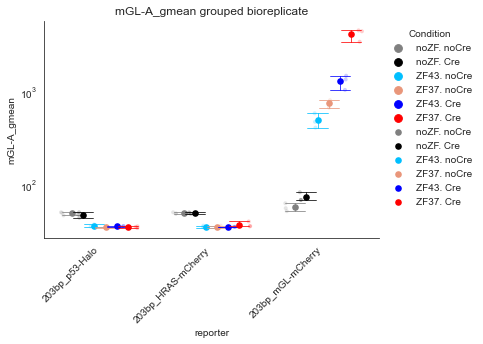

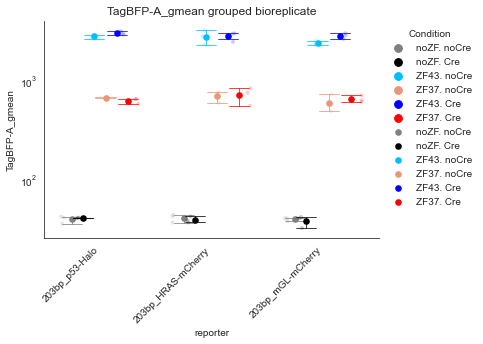

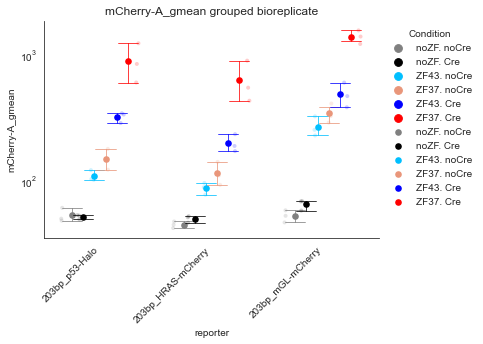

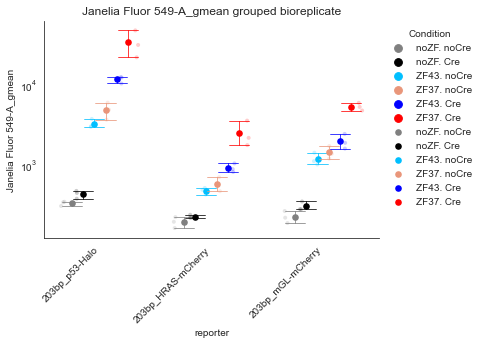

<Figure size 432x288 with 0 Axes>

In [ ]:
#Plot summary plot for the desired statistics

palette = {
           'noZF. noCre': 'grey',
           'noZF. Cre': 'black',
           'ZF43. noCre': 'deepskyblue',
           'ZF43. Cre': 'blue',
           'ZF37. noCre': 'darksalmon',
           'ZF37. Cre': 'red'
}

hue_order = pd.array([
                      'noZF. noCre',
                      'noZF. Cre',
                      'ZF43. noCre',
                      'ZF37. noCre',
                      'ZF43. Cre',
                      'ZF37. Cre'
])


#List of stats to plot 
stats_plot = pd.array( ['mGL-A_gmean', 'TagBFP-A_gmean', 'mCherry-A_gmean', 'Janelia Fluor 549-A_gmean'])
#set plotting parameters 
order_repts = pd.array( ['203bp_p53-Halo', '203bp_HRAS-mCherry', '203bp_mGL-mCherry'])

order = order_repts; palette = palette; hue_order = hue_order; x = 'reporter'; hue='cond'; yscale= 'log'
# ylim = [1, 1e4]

#Only plot some reporters
data_now = s_bioreplicate[s_bioreplicate['reporter'].isin(order_repts)]
data_now = data_now[data_now['cond'].isin(hue_order)]
#display(data_now)

#Set p-value significance comparisons 
pairs = [
]

for stat in stats_plot:
    y = stat # set the stat to plot
    plottitle = y + ' grouped bioreplicate'
    plt.yscale(yscale)
    g = summary_plot( x=x, y=y, hue=hue, data=data_now, pairs=pairs, yscale =yscale,
                    x_rot=45, palette = palette, order=order, hue_order=hue_order, plottitle=plottitle)
    #g.figure.savefig(figure_folder + plottitle + '.svg',dpi=300,bbox_inches='tight')

## Summary Plots / 1D Hist target gene for each rept separately 

In [ ]:
display(hue_order)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

noZF. noCre v.s. noZF. Cre: t-test independent samples, P_val=3.083e-02 stat=-3.269e+00
ZF43. noCre v.s. ZF43. Cre: t-test independent samples, P_val=2.891e-04 stat=-1.186e+01
ZF37. noCre v.s. ZF37. Cre: t-test independent samples, P_val=1.861e-02 stat=-3.830e+00
noZF. Cre v.s. ZF43. noCre: t-test independent samples, P_val=3.279e-04 stat=-1.149e+01


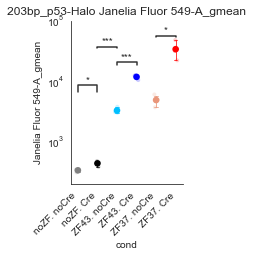

<Figure size 432x288 with 0 Axes>

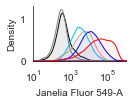

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

noZF. noCre v.s. noZF. Cre: t-test independent samples, P_val=9.417e-02 stat=-2.185e+00
ZF43. noCre v.s. ZF43. Cre: t-test independent samples, P_val=4.650e-03 stat=-5.711e+00
ZF37. noCre v.s. ZF37. Cre: t-test independent samples, P_val=2.239e-02 stat=-3.618e+00
noZF. Cre v.s. ZF43. noCre: t-test independent samples, P_val=2.787e-03 stat=-6.564e+00


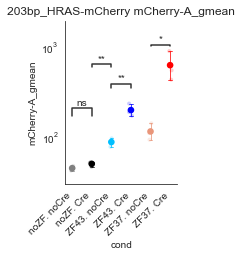

<Figure size 432x288 with 0 Axes>

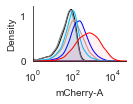

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

noZF. noCre v.s. noZF. Cre: t-test independent samples, P_val=4.728e-02 stat=-2.831e+00
ZF43. noCre v.s. ZF43. Cre: t-test independent samples, P_val=4.528e-03 stat=-5.753e+00
ZF37. noCre v.s. ZF37. Cre: t-test independent samples, P_val=6.932e-04 stat=-9.472e+00
noZF. Cre v.s. ZF43. noCre: t-test independent samples, P_val=1.262e-03 stat=-8.102e+00


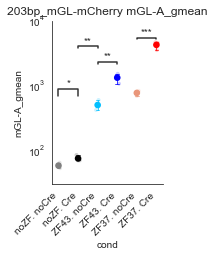

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

noZF. noCre v.s. noZF. Cre: t-test independent samples, P_val=6.142e-02 stat=-2.579e+00
ZF43. noCre v.s. ZF43. Cre: t-test independent samples, P_val=3.637e-02 stat=-3.096e+00
ZF37. noCre v.s. ZF37. Cre: t-test independent samples, P_val=5.746e-04 stat=-9.943e+00
noZF. Cre v.s. ZF43. noCre: t-test independent samples, P_val=2.143e-03 stat=-7.043e+00


<Figure size 432x288 with 0 Axes>

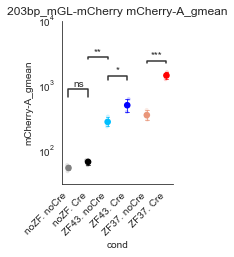

<Figure size 432x288 with 0 Axes>

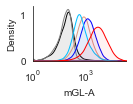

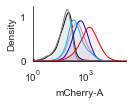

In [ ]:
#Plot summary plot for the desired statistics
palette = {
           'noZF. noCre': 'grey',
           'noZF. Cre': 'black',
           'ZF43. noCre': 'deepskyblue',
           'ZF43. Cre': 'blue',
           'ZF37. noCre': 'darksalmon',
           'ZF37. Cre': 'red'
}

order = pd.array([
    'noZF. noCre',
    'noZF. Cre',
    'ZF43. noCre',
    'ZF43. Cre',
    'ZF37. noCre',
    'ZF37. Cre'
])

#List of stats to plot 
stats_plot_list = { #different stat for each reporter
    '203bp_p53-Halo': pd.array(['Janelia Fluor 549-A_gmean']), 
    '203bp_HRAS-mCherry': pd.array(['mCherry-A_gmean']), 
    '203bp_mGL-mCherry': pd.array(['mGL-A_gmean', 'mCherry-A_gmean' ])
}

stats_plot_list_hist = { #different stat for each reporter
    '203bp_p53-Halo': pd.array(['Janelia Fluor 549-A']), 
    '203bp_HRAS-mCherry': pd.array(['mCherry-A']), 
    '203bp_mGL-mCherry': pd.array(['mGL-A', 'mCherry-A' ])
}

hist_xlim = { #different stat for each reporter
    '203bp_p53-Halo': [1e1, 1e6], 
    '203bp_HRAS-mCherry': [1e0, 0.5e5], 
    '203bp_mGL-mCherry':[1e0, 2e5]
}

#set plotting parameters 
repts = pd.array( [ '203bp_p53-Halo', '203bp_HRAS-mCherry', '203bp_mGL-mCherry'])

palette = palette; hue_order = None; x = 'cond'; hue=None; yscale= 'log'
# ylim = [1, 1e4]

#Set p-value significance comparisons 
pairs = [ ['noZF. noCre', 'noZF. Cre'], 
         ['ZF43. noCre', 'ZF43. Cre'], 
         ['ZF37. noCre', 'ZF37. Cre'], 
         ['noZF. Cre', 'ZF43. noCre'], 
         #['ZF37. Cre', 'ZF43. Cre'], 
         #['ZF37. noCre', 'ZF43. noCre'], 
         #['ZF37. noCre', 'ZF43. Cre']
]

ylims = { #different stat for each reporter
    '203bp_p53-Halo': [2e2, 1e5] , 
    '203bp_HRAS-mCherry': [3e1, 2e3] , 
    '203bp_mGL-mCherry': [3e1, 1e4] 
}


for rept in repts: 
    stats_plot = stats_plot_list[rept]
    stats_plot_hist = stats_plot_list_hist[rept]
    ylim = ylims[rept]
    for stat in stats_plot:
        y = stat # set the stat to plot

        #Summary Plots 
        data_now = s_bioreplicate[s_bioreplicate['reporter']==rept]
        data_now = data_now[data_now['cond'].isin(order)]
        xsize =2; ysize = 3
        plottitle = rept + ' ' + stat
        g = plt.figure(figsize=(xsize,ysize))
        g = summary_plot( x=x, y=y, hue=hue, data=data_now, pairs=pairs, yscale =yscale,
                         ylim = ylim,  axis_lines={'top': False, 'bottom': True, 'left': True, 'right': False},
                        x_rot=45, palette = palette, order=order, hue_order=hue_order, plottitle=plottitle)
        g.figure.savefig(figure_folder + plottitle + '.svg',dpi=300,bbox_inches='tight')

    for stat in stats_plot_hist: 
        #Histogram 
        data_now = data_iRFP670gated[data_iRFP670gated['reporter']==rept]
        data_now = data_now[data_now['cond'].isin(order)]
        xsize =3; ysize = 3
        parameters = pd.array([stat]) ; xlim = [1e0,1e6]; hue_hist='cond'; hueorder_hist=None
        xsize_hist =  2.5/1.5
        ysize_hist = 1.5/1.5
        plottitle = rept + ' ' + stat + '_h'
        g = plt.figure(figsize=(xsize_hist,ysize_hist))
        g = custom_hist_plot( data_now, parameters, hue=hue_hist, palette=palette, hueorder=hueorder_hist, xsize=xsize_hist, ysize=ysize_hist, 
                             title='', alpha=0.05, legend=False,
                            legendtitle='Condition', xlim=hist_xlim[rept])
        g = g.get_figure()
        g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')



## Summary plots TagBFP

In [27]:
repts = pd.array( [ '203bp_mGL-mCherry', '203bp_p53-Halo', '203bp_HRAS-mCherry'])
data_now = s_bioreplicate[ s_bioreplicate['reporter'].isin(repts)]
display( pd.unique(data_now['Rept.Cre']))

array(['203bp_HRAS-mCherry.Cre', '203bp_HRAS-mCherry.noCre',
       '203bp_mGL-mCherry.Cre', '203bp_mGL-mCherry.noCre',
       '203bp_p53-Halo.Cre', '203bp_p53-Halo.noCre'], dtype=object)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

noZF_203bp_HRAS-mCherry.noCre v.s. noZF_203bp_HRAS-mCherry.Cre: t-test independent samples, P_val=5.346e-01 stat=6.787e-01
ZF43_203bp_mGL-mCherry.noCre v.s. ZF43_203bp_mGL-mCherry.Cre: t-test independent samples, P_val=2.424e-02 stat=-3.530e+00
ZF43_203bp_HRAS-mCherry.noCre v.s. ZF43_203bp_HRAS-mCherry.Cre: t-test independent samples, P_val=9.023e-01 stat=-1.308e-01
ZF37_203bp_mGL-mCherry.noCre v.s. ZF37_203bp_mGL-mCherry.Cre: t-test independent samples, P_val=5.388e-01 stat=-6.712e-01
ZF37_203bp_HRAS-mCherry.noCre v.s. ZF37_203bp_HRAS-mCherry.Cre: t-test independent samples, P_val=8.865e-01 stat=-1.520e-01
noZF_203bp_mGL-mCherry.noCre v.s. noZF_203bp_mGL-mCherry.Cre: t-test independent samples, P_val=6.630e-01 stat=4.697e-01
noZF_203bp_p53-Halo.noCre v.s. noZF_203bp_p53-Halo.Cre: t-test independent samples, P_val=5.930e-01 

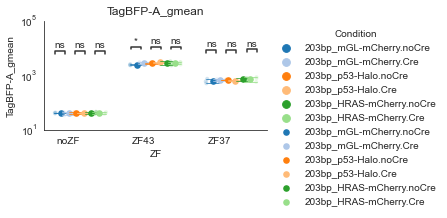

<Figure size 432x288 with 0 Axes>

In [28]:
### Summary Plot for just TagBFP for all the reporters 
repts = pd.array( [ '203bp_mGL-mCherry', '203bp_p53-Halo', '203bp_HRAS-mCherry'])
data_now = s_bioreplicate[ s_bioreplicate['reporter'].isin(repts)]

x = 'ZF'
order = pd.array( [ 'noZF', 'ZF43', 'ZF37'])
y = 'TagBFP-A_gmean'
hue = 'Rept.Cre'
palette = 'tab20'
hue_order = ['203bp_mGL-mCherry.noCre','203bp_mGL-mCherry.Cre', 
    '203bp_p53-Halo.noCre','203bp_p53-Halo.Cre',
    '203bp_HRAS-mCherry.noCre','203bp_HRAS-mCherry.Cre' 
     ]
yscale = 'log'
ylim = [1e1, 1e5]
xsize =4; ysize = 2
pairs = [
    [ ('noZF', '203bp_mGL-mCherry.noCre'),('noZF','203bp_mGL-mCherry.Cre')], 
    [ ('noZF', '203bp_HRAS-mCherry.noCre'),('noZF','203bp_HRAS-mCherry.Cre')], 
    [ ('noZF', '203bp_p53-Halo.noCre'),('noZF','203bp_p53-Halo.Cre')], 
        [ ('ZF43', '203bp_mGL-mCherry.noCre'),('ZF43','203bp_mGL-mCherry.Cre')], 
    [ ('ZF43', '203bp_HRAS-mCherry.noCre'),('ZF43','203bp_HRAS-mCherry.Cre')], 
    [ ('ZF43', '203bp_p53-Halo.noCre'),('ZF43','203bp_p53-Halo.Cre')], 
        [ ('ZF37', '203bp_mGL-mCherry.noCre'),('ZF37','203bp_mGL-mCherry.Cre')], 
    [ ('ZF37', '203bp_HRAS-mCherry.noCre'),('ZF37','203bp_HRAS-mCherry.Cre')], 
    [ ('ZF37', '203bp_p53-Halo.noCre'),('ZF37','203bp_p53-Halo.Cre')]
]

plottitle = 'TagBFP-A_gmean'
g = plt.figure(figsize=(xsize,ysize))
g = summary_plot( x=x, y=y, hue=hue, data=data_now, pairs=pairs, yscale =yscale,
                    ylim = ylim, 
                x_rot=0, palette = palette, order=order, hue_order=hue_order, plottitle=plottitle)
g.figure.savefig(figure_folder + plottitle + '.svg',dpi=300,bbox_inches='tight')